In [1]:
#%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math

In [2]:
x = []
y = []
z = []
u = []
v = []
w = []
for i in range(-2, 3):
    for j in range(-2,3):
        for k in range(-2,3):
            x.append(i)
            y.append(j)
            z.append(k)
            u.append(0)
            v.append(0)
            w.append(0)

In [3]:
n = [1, 0, 0]
d = [0, 1, 0]
M0 = 100
h = 2
koef = M0/(h*h*h*h)
mxx = koef*2*n[0]*d[0]
myy = koef*2*n[1]*d[1]
mzz = koef*2*n[2]*d[2]
mxy = koef*(n[0]*d[1] + n[1]*d[0])
mxz = koef*(n[0]*d[2] + n[2]*d[0])
myz = koef*(n[1]*d[2] + n[2]*d[1])

In [4]:
def get_index(i, j, k):
    return i*25 + j*5 + k + 62

In [5]:
def add_force(c, i, j, k, value):
    index = get_index(i, j, k)
    if c == 'x':
        u[index] += value
    if c == 'y':
        v[index] += value
    if c == 'z':
        w[index] += value

In [6]:
def init_forces():
    # x component
    add_force('x', 1, 0, 0, mxx)
    add_force('x', -1, 0, 0, -mxx)
    add_force('x', -1, 2, 0, mxy/4)
    add_force('x', 1, 2, 0, mxy/4)
    add_force('x', -1, -2, 0, -mxy/4)
    add_force('x', 1, -2, 0, -mxy/4)
    add_force('x', -1, 0, 2, mxz/4)
    add_force('x', 1, 0, 2, mxz/4)
    add_force('x', -1, 0, -2, -mxz/4)
    add_force('x', 1, 0, -2, -mxz/4)
    # y component
    add_force('y', 0, 1, 0, myy)
    add_force('y', 0, -1, 0, -myy)
    add_force('y', 2, -1, 0, mxy/4)
    add_force('y', 2, 1, 0, mxy/4)
    add_force('y', -2, -1, 0, -mxy/4)
    add_force('y', -2, 1, 0, -mxy/4)
    add_force('y', 0, -1, 2, myz/4)
    add_force('y', 0, 1, 2, myz/4)
    add_force('y', 0, -1, -2, myz/4)
    add_force('y', 0, 1, -2, -myz/4)
    # z component
    add_force('z', 0, 0, 1, mzz)
    add_force('z', 0, 0, -1, -mzz)
    add_force('z', 2, 0, -1, mxz/4)
    add_force('z', 2, 0, 1, mxz/4)
    add_force('z', -2, 0, -1, -mxz/4)
    add_force('z', -2, 0, 1, -mxz/4)
    add_force('z', 0, 2, -1, myz/4)
    add_force('z', 0, 2, 1, myz/4)
    add_force('z', 0, -2, -1, myz/4)
    add_force('z', 0, -2, 1, -myz/4)

In [17]:
def draw_interactive(angle1, angle2):
    #interactive
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(angle1, angle2)
    ax.quiver(x, y, z, u, v, w)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim3d(-3,3)
    ax.set_ylim3d(-3,3)
    ax.set_zlim3d(-3,3)
    fig.set_size_inches(20, 20)

    ax.quiver(0, 0, 0, n[0], n[1], n[2], color = 'r')
    ax.text(n[0], n[1], n[2], "normal", n)
    ax.quiver(0, 0, 0, d[0], d[1], d[2], color = 'g')
    ax.text(d[0], d[1], d[2], "slip", d)

    plt.show()

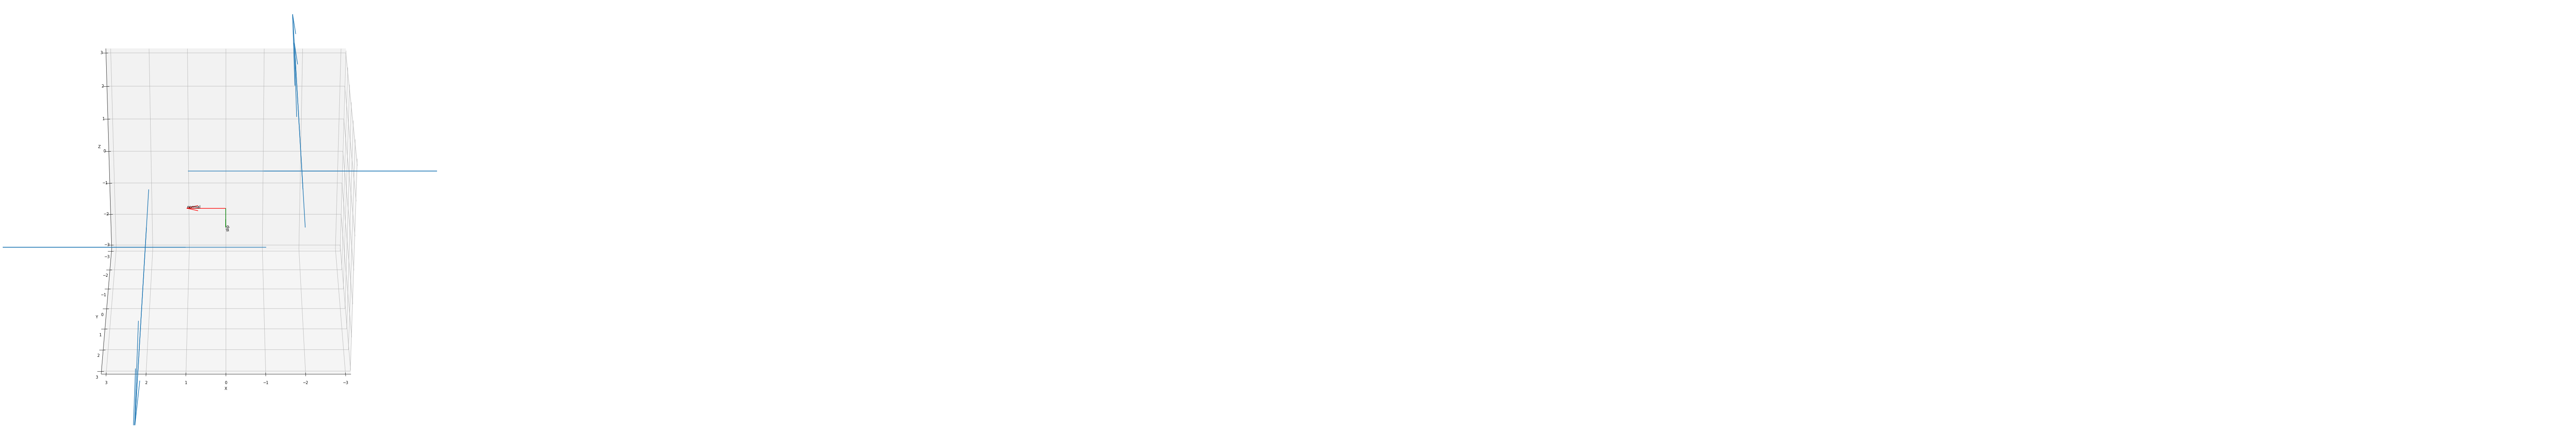

In [18]:
init_forces()
draw_interactive(30, 90)